- https://nbviewer.jupyter.org/gist/ingle/93de575aac6a4c7fe9ee5f3d5adab98f
- https://dsp.stackexchange.com/questions/35878/non-negative-matrix-factorization-for-audio-separation-why-does-it-work

In [1]:
from sklearn.decomposition.nmf import NMF
import librosa
from scipy.signal import stft, istft
import numpy as np
from IPython.display import Audio
import matplotlib.pyplot as plt

In [2]:
# wav = '/home/sen/Music/2322_6sec.wav'
# wav = '/home/sen/Music/2313_20sec.wav'
wav = '/home/sen/Music/186942__lemoncreme__piano-melody.wav'
# wav = '/home/sen/Music/drums.wav'

In [3]:
sig, sr = librosa.load(wav, sr=None)
n_window = int(0.03 * sr)

In [4]:
fq, t, fq_amp = stft(sig, nperseg=n_window, fs=sr)
fq_spec = abs(fq_amp)

In [5]:
def nmf_transfer(matrix, nmf=None, n_components=20):
    if not nmf:
        nmf = NMF(n_components=n_components)
        nmf.fit(matrix)

    fq_spec_trans = nmf.transform(matrix)
    fq_spec_trans_inv = nmf.inverse_transform(fq_spec_trans)
    return nmf, fq_spec_trans_inv

In [6]:
def nmf_decompose(fq_spec, nmf=None, n_components=20):
    nmf, fq_spec_trans_inv = nmf_transfer(fq_spec.T, nmf=nmf, n_components=n_components)
    fq_spec_trans_inv = fq_spec_trans_inv.T
    return nmf, fq_spec_trans_inv

In [7]:
nmf, fq_spec_trans_inv = nmf_decompose(fq_spec)

In [8]:
fq_amp_trans_inv = fq_spec_trans_inv * fq_amp/(fq_spec+0.000001)
t, sig_inv = istft(fq_amp_trans_inv, fs=sr)

In [9]:
Audio(sig, rate=sr)

In [10]:
Audio(sig_inv, rate=sr)

Text(0.5, 0, 'hz')

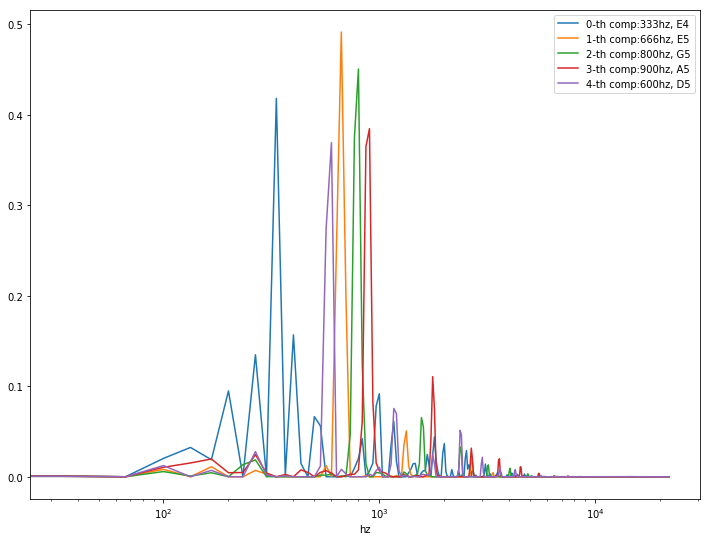

In [23]:
plt.figure(figsize=(12, 9))
for idx in range(5):
    comp = nmf.components_[idx]
    peak_hz = int(fq[comp.argmax()])
    note = librosa.hz_to_note(peak_hz)
    plt.plot(fq, comp, label='{}-th comp:{}hz, {}'.format(idx, peak_hz, note))
plt.xscale('log')
plt.legend()
plt.xlabel('hz')

In [17]:
print(librosa.hz_to_note(fq[nmf.components_[0].argmax()]))
print(librosa.hz_to_note(fq[nmf.components_[1].argmax()]))
print(librosa.hz_to_note(fq[nmf.components_[2].argmax()]))

E4
E5
G5


In [47]:
fq_spec.shape

(662, 2010)

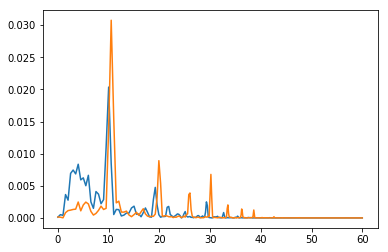

In [13]:
plt.plot(mel, fq_spec[:,50])
plt.plot(mel, fq_spec[:,150])

In [14]:
fq_a_weighting_db = librosa.A_weighting(fq)
fq_a_weighting = librosa.db_to_amplitude(fq_a_weighting_db)

/home/sen/env/ml/lib/python3.6/site-packages/librosa/core/time_frequency.py:1006: RuntimeWarning: divide by zero encountered in log10
  - 0.5 * np.log10(f_sq + const[3]))


In [15]:
fq_spec_a = fq_a_weighting.reshape(-1, 1) * fq_spec

In [16]:
nmf, fq_spec_a_trans_inv = nmf_decompose(fq_spec_a)

In [17]:
fq_spec_trans_inv = fq_spec_a_trans_inv / fq_a_weighting.reshape(-1, 1)

In [18]:
fq_amp_trans_inv = fq_spec_trans_inv * fq_amp/(fq_spec+0.000001)
t, sig_inv = istft(fq_amp_trans_inv, fs=sr)

In [19]:
Audio(sig, rate=sr)

In [20]:
Audio(sig_inv, rate=sr)

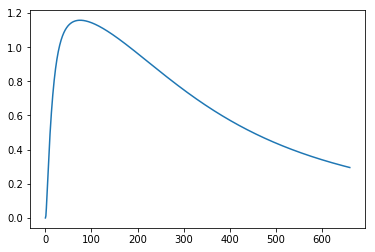

In [41]:
plt.plot(fq_weighted)

# declipping

In [14]:
sig.max(), sig.min()

(0.3453369, -0.39186096)

In [15]:
sig_clip = np.clip(sig, -0.1, 0.1)

In [16]:
Audio(sig_clip, rate=sr)